In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [37]:
df=pd.read_csv('house_prices.csv')

In [38]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [40]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [41]:
df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [42]:
#one hot encoding for categorical data and replacing null values by median for the numerical data
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [43]:
df.head(10)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,East,Main Road,Srushti Siddhi Mangal Murti Complex,1,2,1 Covered,Freehold,1100 sqft,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,2,1 Open,Freehold,1100 sqft,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,2,1 Covered,Freehold,1100 sqft,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,6034.0,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,East,Main Road,Hamdam Apartment,1,1,1 Covered,Freehold,1100 sqft,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,2,1 Covered,Co-operative Society,1100 sqft,NaN,NaN
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,45 Lac,6618.0,thane,1000 sqft,Ready to Move,2 out of 7,Resale,...,East,"Garden/Park, Main Road",Virat Aangan,1,1,1 Covered,Co-operative Society,680 sqft,NaN,NaN
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,16.5 Lac,2538.0,thane,550 sqft,Ready to Move,4 out of 5,Resale,...,East,Main Road,Hamdam Apartment,1,2,1 Covered,Freehold,1100 sqft,NaN,NaN
7,7,1 BHK Ready to Occupy Flat for sale Kalwa,Creatively planned and constructed is a 1 BHK ...,60 Lac,10435.0,thane,1000 sqft,Ready to Move,Ground out of 7,Resale,...,East,Main Road,Hamdam Apartment,1,2,1 Covered,Freehold,575 sqft,NaN,NaN
8,8,1 BHK Ready to Occupy Flat for sale Kalwa,Discover this immaculate 1 BHK flat for sale a...,60 Lac,10000.0,thane,1000 sqft,Ready to Move,Ground out of 2,Resale,...,East,Main Road,Hamdam Apartment,1,2,1 Covered,Co-operative Society,600 sqft,NaN,NaN
9,9,3 BHK Ready to Occupy Flat for sale in Pride P...,One can find this stunning 3 BHK flat for sale...,1.60 Cr,11150.0,thane,900 sqft,Ready to Move,3 out of 27,Resale,...,East,Garden/Park,Pride Palms,3,1,1 Covered,Freehold,1100 sqft,NaN,NaN


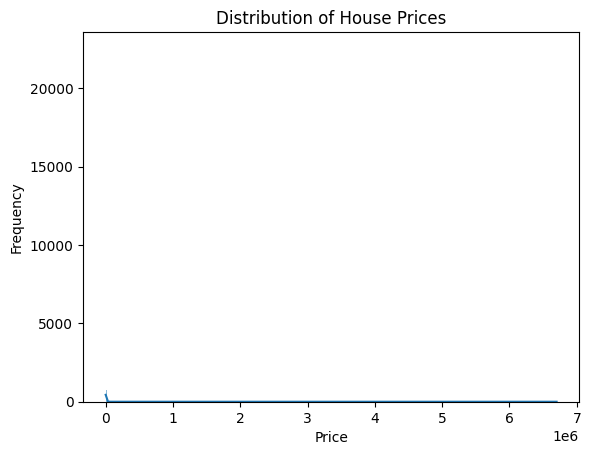

In [44]:
sns.histplot(df['Price (in rupees)'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [45]:
df.drop(['Dimensions', 'Plot Area', 'Super Area', 'Society', 'Car Parking', 'Society', 'overlooking', 'facing', 'Carpet Area'], axis=1, inplace = True)

In [46]:
df.drop(columns=['Index'],inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Title              187531 non-null  object 
 1   Description        187531 non-null  object 
 2   Amount(in rupees)  187531 non-null  object 
 3   Price (in rupees)  187531 non-null  float64
 4   location           187531 non-null  object 
 5   Status             187531 non-null  object 
 6   Floor              187531 non-null  object 
 7   Transaction        187531 non-null  object 
 8   Furnishing         187531 non-null  object 
 9   Bathroom           187531 non-null  object 
 10  Balcony            187531 non-null  object 
 11  Ownership          187531 non-null  object 
dtypes: float64(1), object(11)
memory usage: 17.2+ MB


In [48]:
df[['Amount(in rupees)','Price (in rupees)','location']]

,Amount(in rupees),Price (in rupees),location
0,42 Lac,6000.0,thane
1,98 Lac,13799.0,thane
2,1.40 Cr,17500.0,thane
3,25 Lac,6034.0,thane
4,1.60 Cr,18824.0,thane
...,...,...,...
187526,63 Lac,3225.0,zirakpur
187527,55 Lac,3274.0,zirakpur
187528,76 Lac,4343.0,zirakpur
187529,30 Lac,4231.0,zirakpur


In [49]:
def convert_amount(amount):
    try:
        if 'Lac' in amount:
            amount = amount.replace('Lac', '').strip()
            return float(amount) * 100000
        elif 'Cr' in amount:
            amount = amount.replace('Cr', '').strip()
            return float(amount) * 10000000
        else:
            return float(amount)
    except ValueError:
        return None

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_amount)
df.rename(columns={'Amount(in rupees)': 'Amount'}, inplace=True)

In [50]:
df.rename(columns={'Price (in rupees)':'Price'},inplace=True)
df.head()

,Title,Description,Amount,Price,location,Status,Floor,Transaction,Furnishing,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.0,thane,Ready to Move,10 out of 11,Resale,Unfurnished,1,2,Freehold
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.0,thane,Ready to Move,3 out of 22,Resale,Semi-Furnished,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.0,thane,Ready to Move,10 out of 29,Resale,Unfurnished,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,6034.0,thane,Ready to Move,1 out of 3,Resale,Unfurnished,1,1,Freehold
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.0,thane,Ready to Move,20 out of 42,Resale,Unfurnished,2,2,Co-operative Society


In [51]:
df.describe()

,Amount,Price
count,1.778470e+05,1.875310e+05
mean,1.198134e+07,7.437787e+03
std,3.943827e+07,2.593087e+04
min,1.000000e+05,0.000000e+00
25%,4.840000e+06,4.501500e+03
50%,7.800000e+06,6.034000e+03
75%,1.450000e+07,8.452500e+03
max,1.400300e+10,6.700000e+06


In [54]:
df.duplicated().sum()

119353

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.duplicated().sum()

0

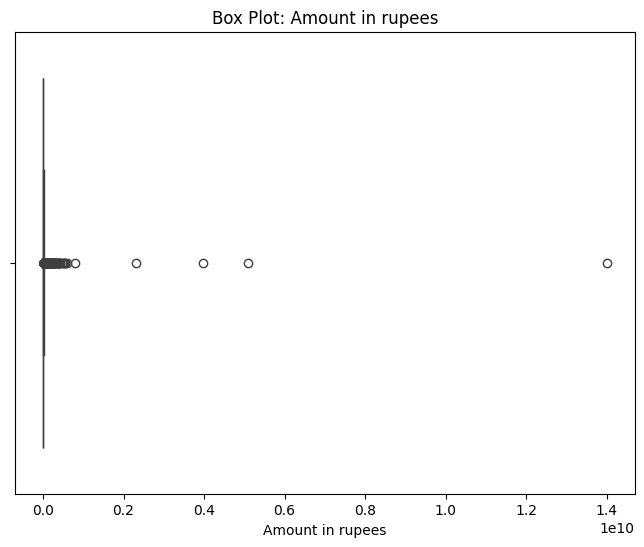

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount', data=df)
plt.title("Box Plot: Amount in rupees")
plt.xlabel("Amount in rupees")
plt.show()

Summary statistics for column Amount
count    6.524300e+04
mean     1.067925e+07
std      6.293087e+07
min      1.000000e+05
25%      4.100000e+06
50%      6.500000e+06
75%      1.090000e+07
max      1.400300e+10
Name: Amount, dtype: float64


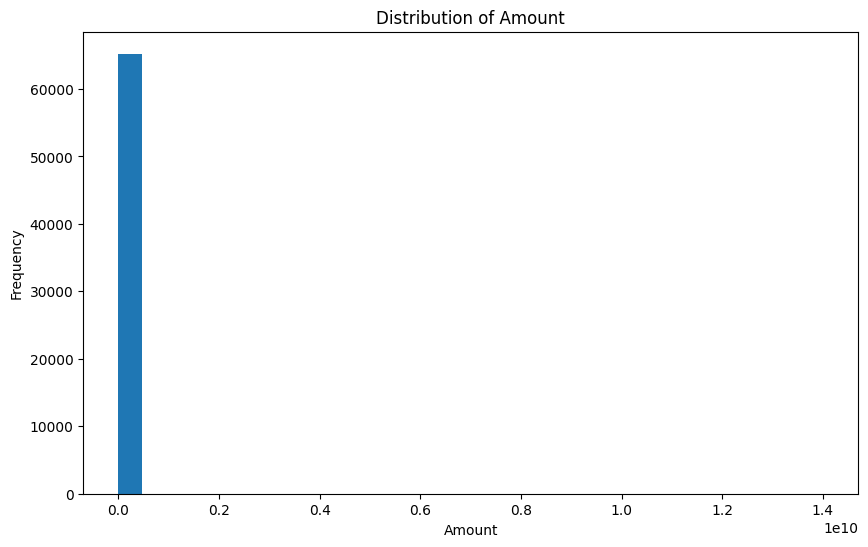

Summary statistics for column Price
count    6.817800e+04
mean     6.739953e+03
std      4.258420e+04
min      0.000000e+00
25%      3.957000e+03
50%      5.357000e+03
75%      6.818000e+03
max      6.700000e+06
Name: Price, dtype: float64


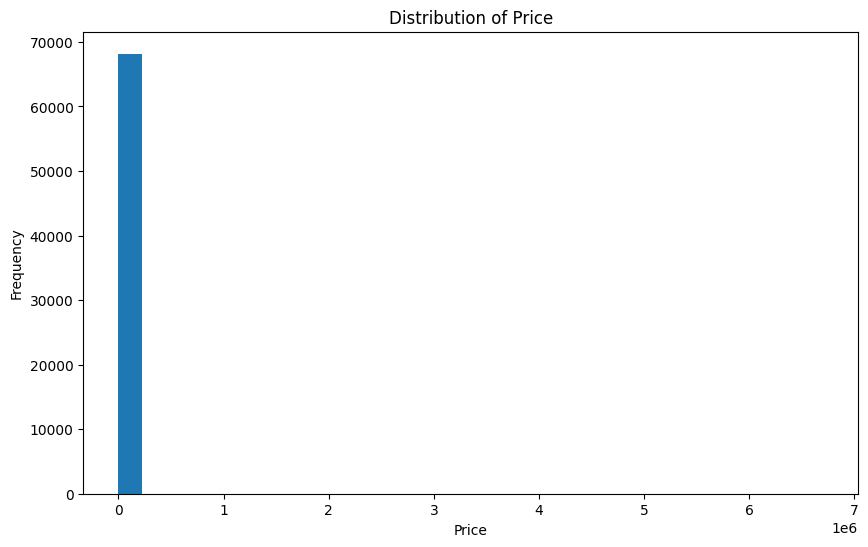

Summary statistics for column Bathroom
count     68178
unique       11
top           2
freq      35158
Name: Bathroom, dtype: object


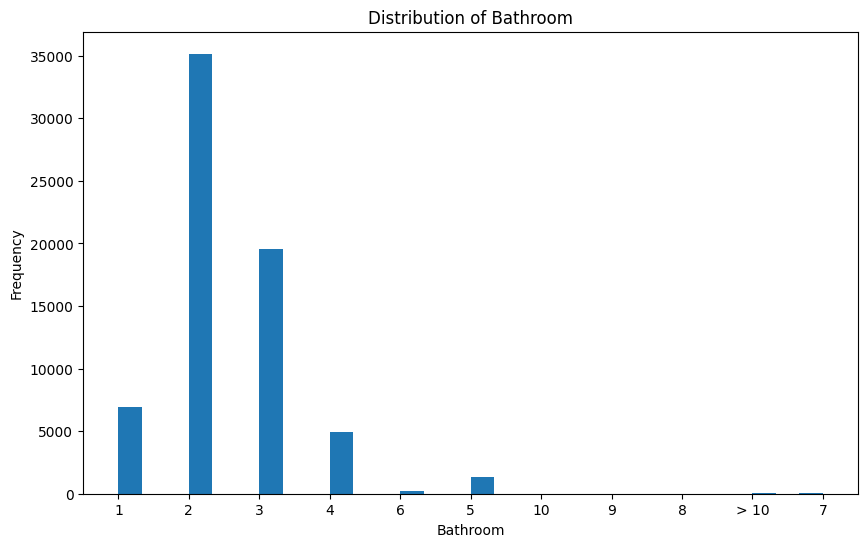

Summary statistics for column Balcony
count     68178
unique       11
top           2
freq      37802
Name: Balcony, dtype: object


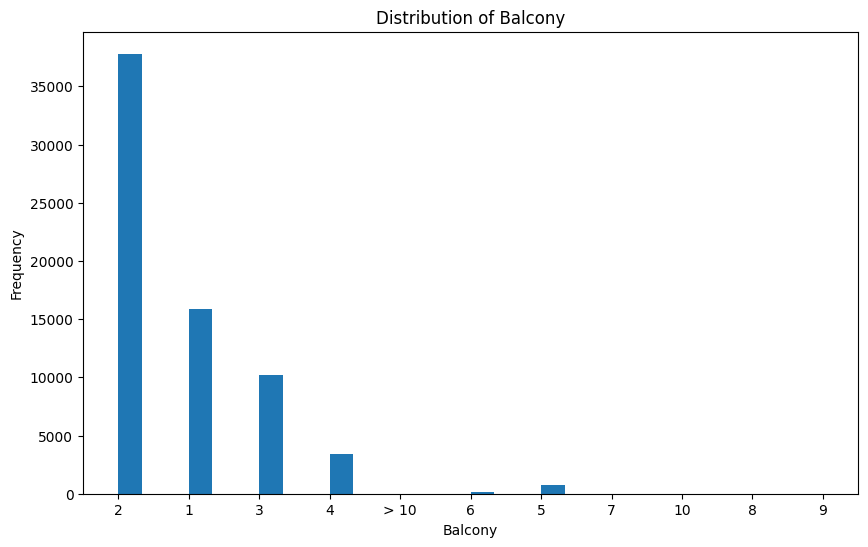

In [58]:
numeric_columns = ['Amount', 'Price', 'Bathroom', 'Balcony']
for column in numeric_columns:
    print("Summary statistics for column", column)
    print(df[column].describe())
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68178 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        68178 non-null  object 
 1   Description  68178 non-null  object 
 2   Amount       65243 non-null  float64
 3   Price        68178 non-null  float64
 4   location     68178 non-null  object 
 5   Status       68178 non-null  object 
 6   Floor        68178 non-null  object 
 7   Transaction  68178 non-null  object 
 8   Furnishing   68178 non-null  object 
 9   Bathroom     68178 non-null  object 
 10  Balcony      68178 non-null  object 
 11  Ownership    68178 non-null  object 
dtypes: float64(2), object(10)
memory usage: 6.8+ MB


Unique values in column Transaction
Transaction
Resale          50687
New Property    17429
Other              60
Rent/Lease          2
Name: count, dtype: int64


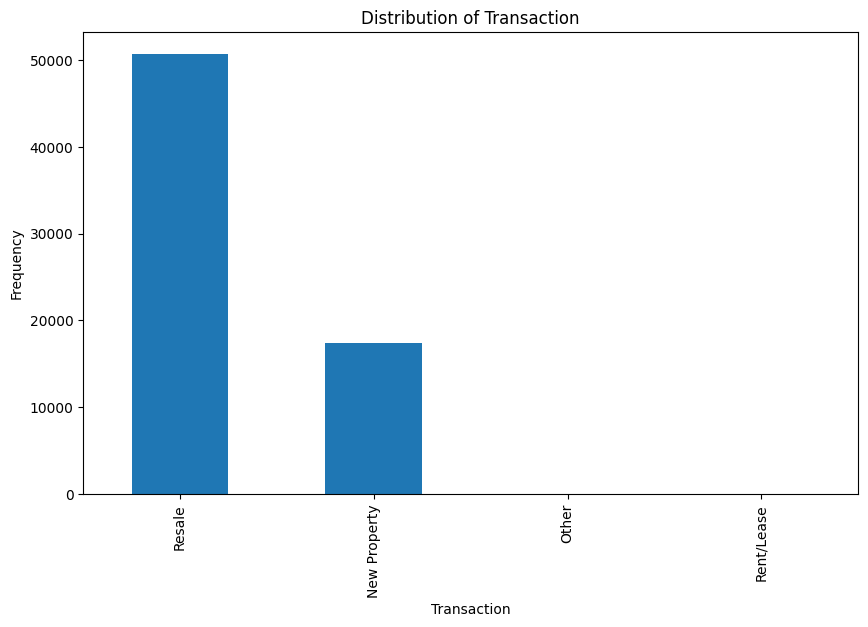

Unique values in column Furnishing
Furnishing
Semi-Furnished    30536
Unfurnished       28527
Furnished          9115
Name: count, dtype: int64


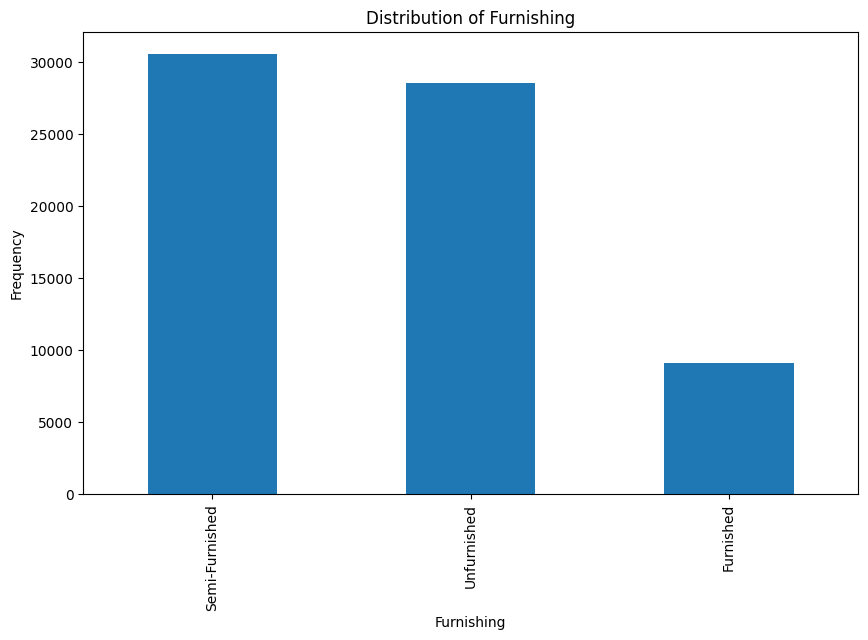

Unique values in column Ownership
Ownership
Freehold                62255
Leasehold                3070
Co-operative Society     2370
Power Of Attorney         483
Name: count, dtype: int64


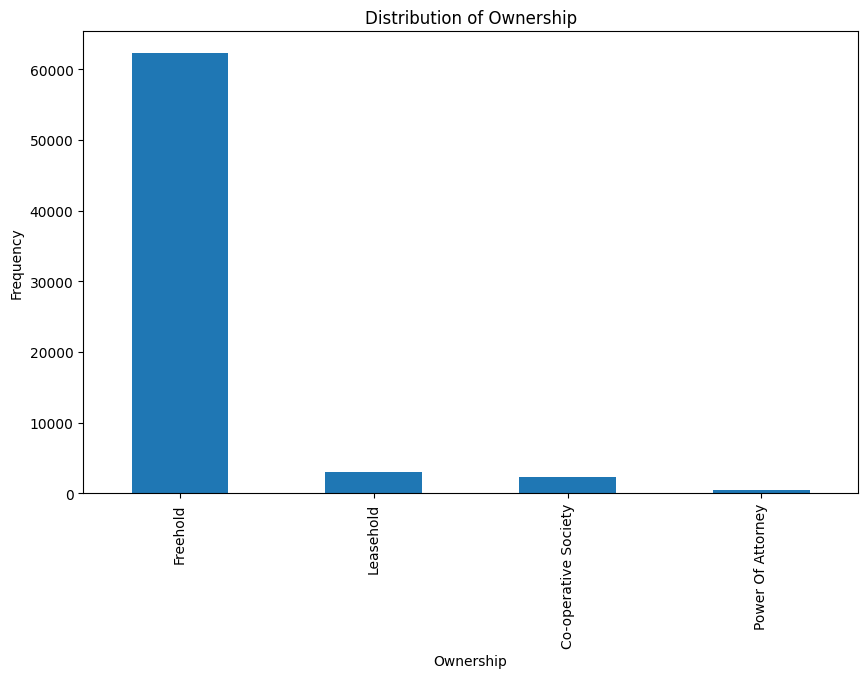

In [61]:
categorical_columns = ['Transaction', 'Furnishing','Ownership']
for column in categorical_columns:
    print("Unique values in column", column)
    print(df[column].value_counts())
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

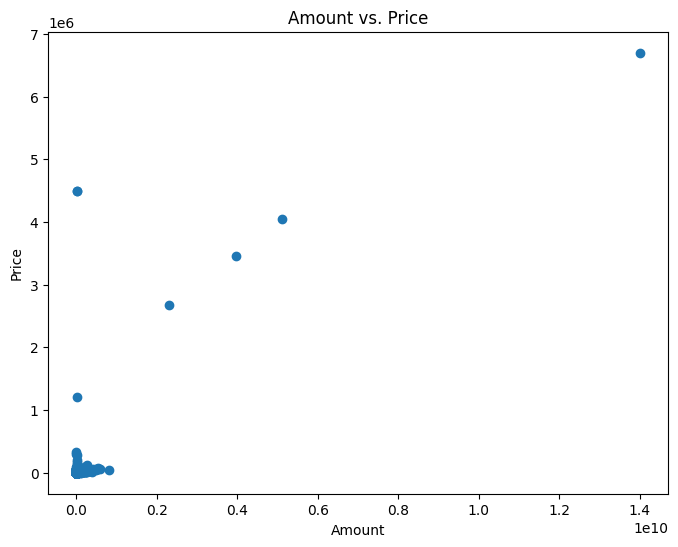

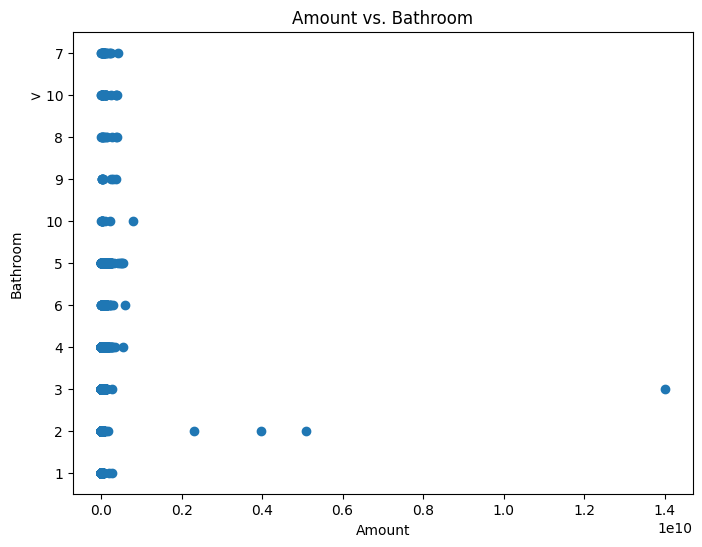

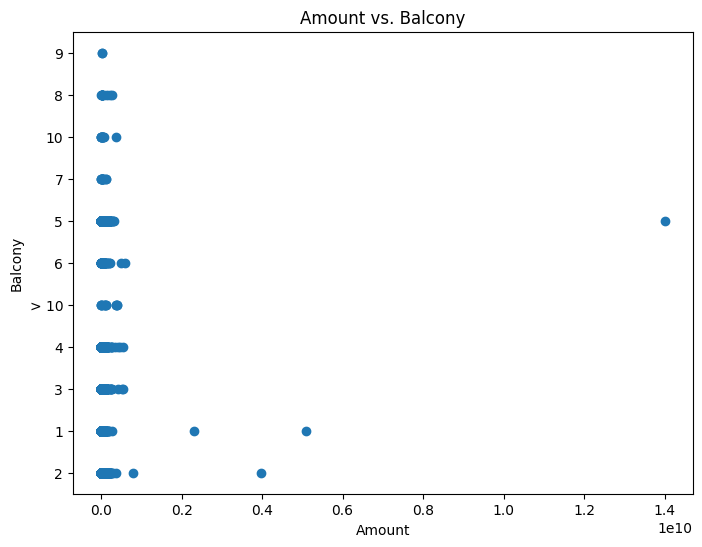

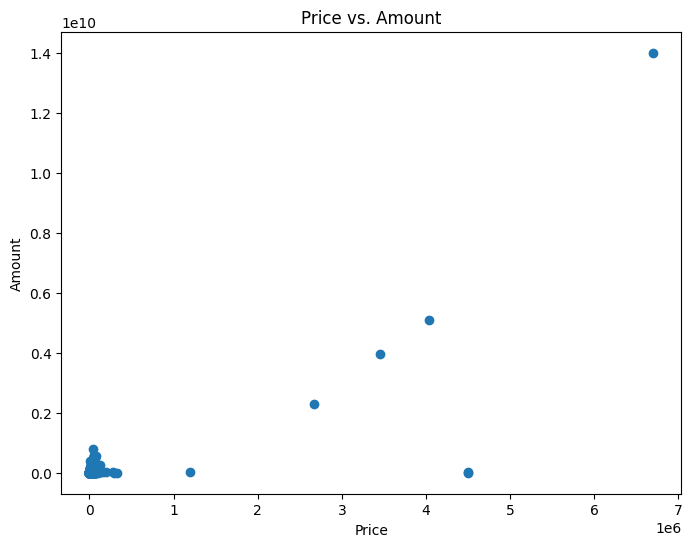

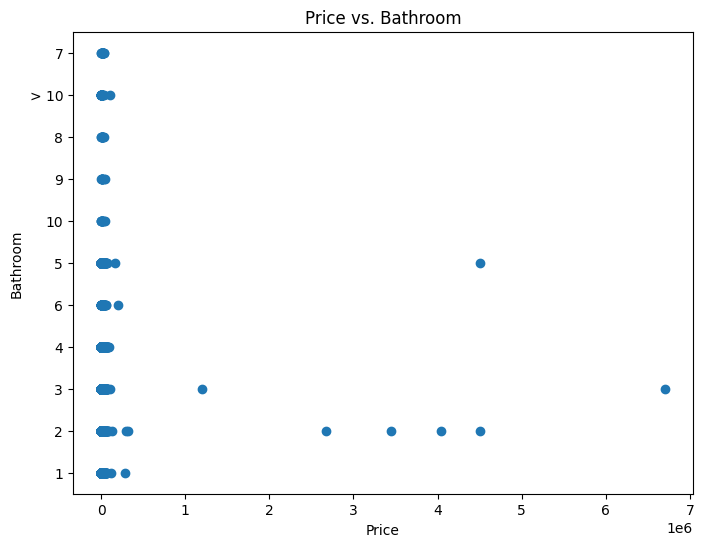

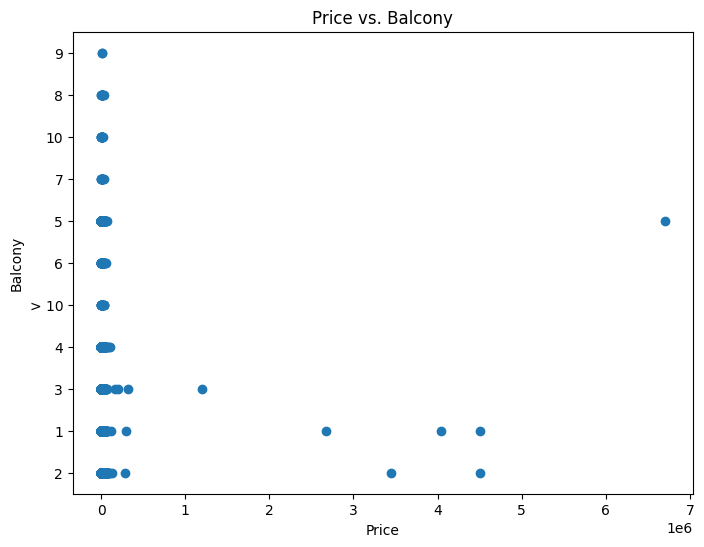

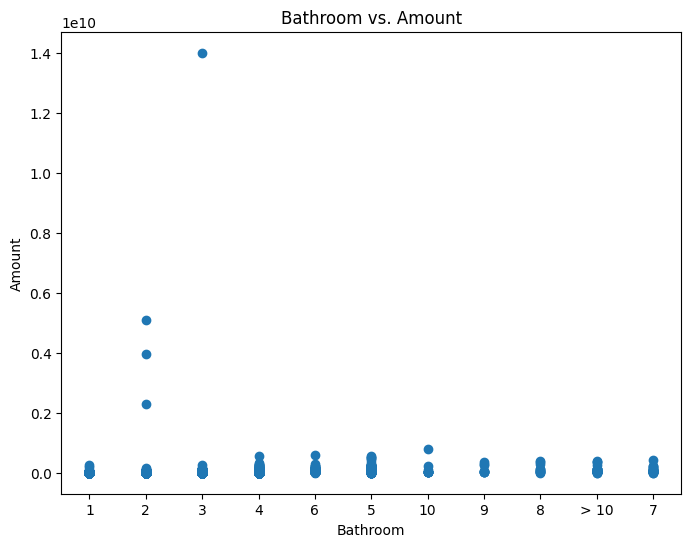

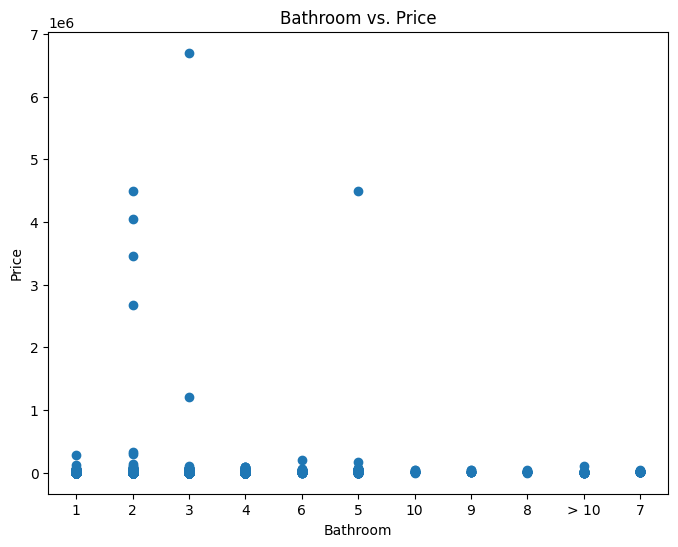

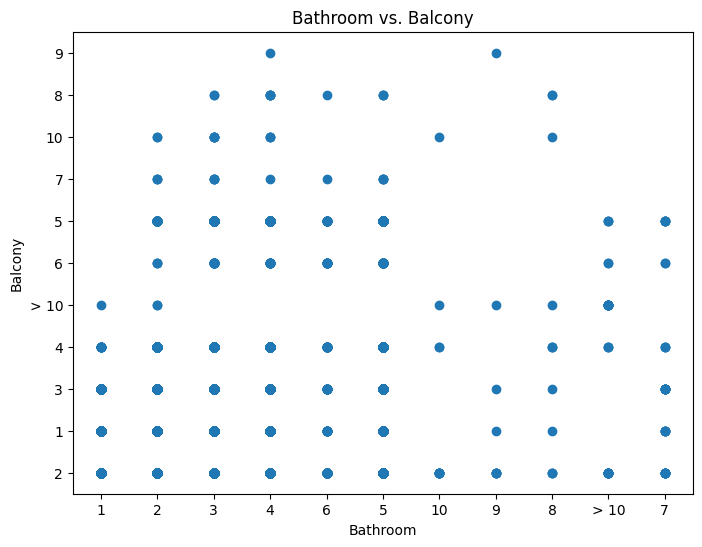

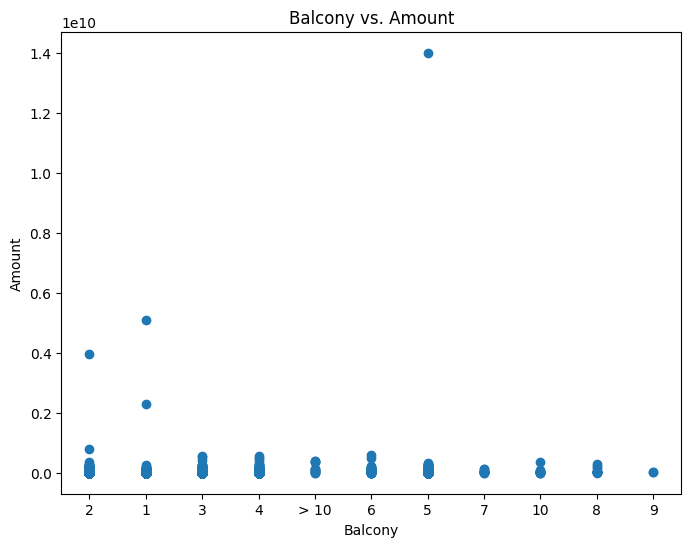

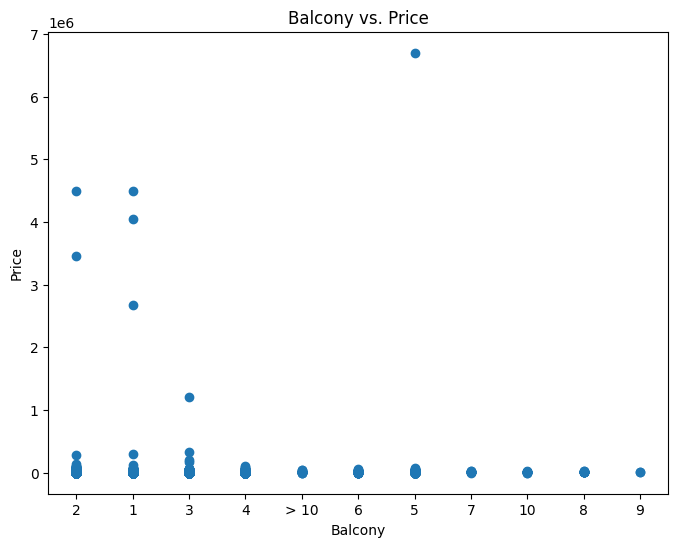

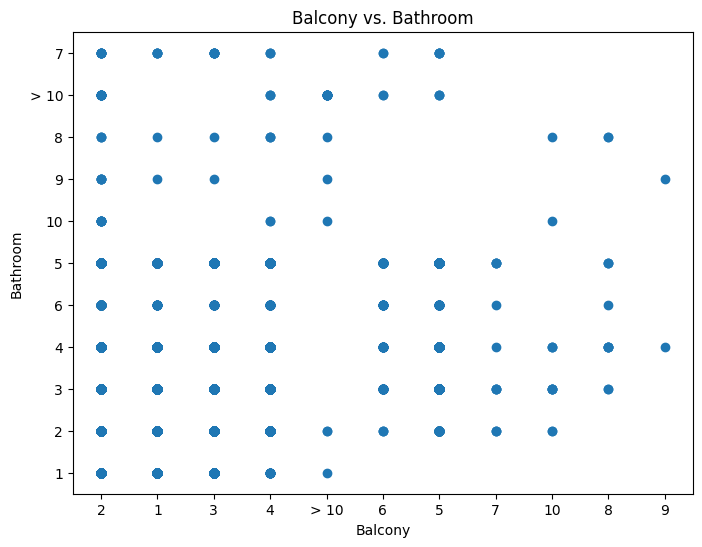

In [62]:
numeric_vs_numeric_columns = ['Amount', 'Price', 'Bathroom', 'Balcony']
for column1 in numeric_vs_numeric_columns:
    for column2 in numeric_vs_numeric_columns:
        if column1 != column2:
            plt.figure(figsize=(8, 6))
            plt.scatter(df[column1], df[column2])
            plt.title(f"{column1} vs. {column2}")
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()


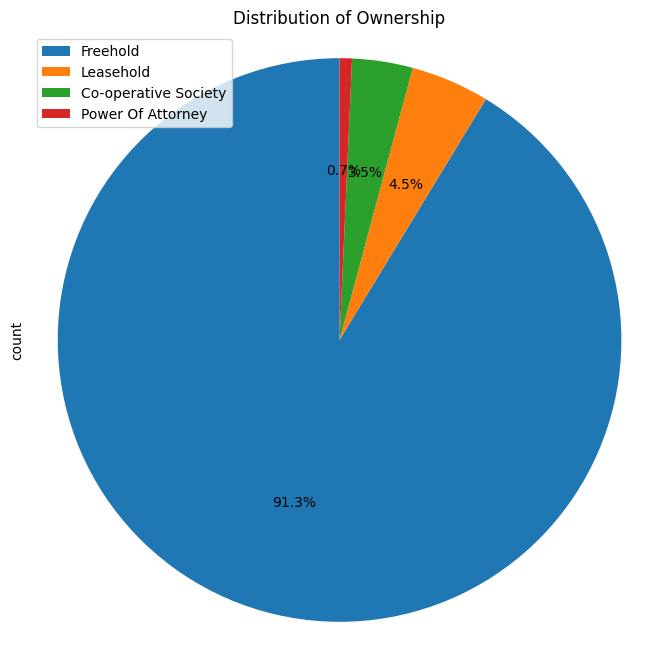

In [63]:
plt.figure(figsize=(8, 8))
df['Ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None, startangle=90)
plt.axis('equal')
plt.legend(labels=df['Ownership'].value_counts().index, loc='best')
plt.title("Distribution of Ownership")
plt.show()

In [65]:
df.drop(columns=['Title','Description','Status'],inplace=True)

In [66]:
df.head(3)

,Amount,Price,location,Floor,Transaction,Furnishing,Bathroom,Balcony,Ownership
0,4200000.0,6000.0,thane,10 out of 11,Resale,Unfurnished,1,2,Freehold
1,9800000.0,13799.0,thane,3 out of 22,Resale,Semi-Furnished,2,2,Freehold
2,14000000.0,17500.0,thane,10 out of 29,Resale,Unfurnished,2,2,Freehold


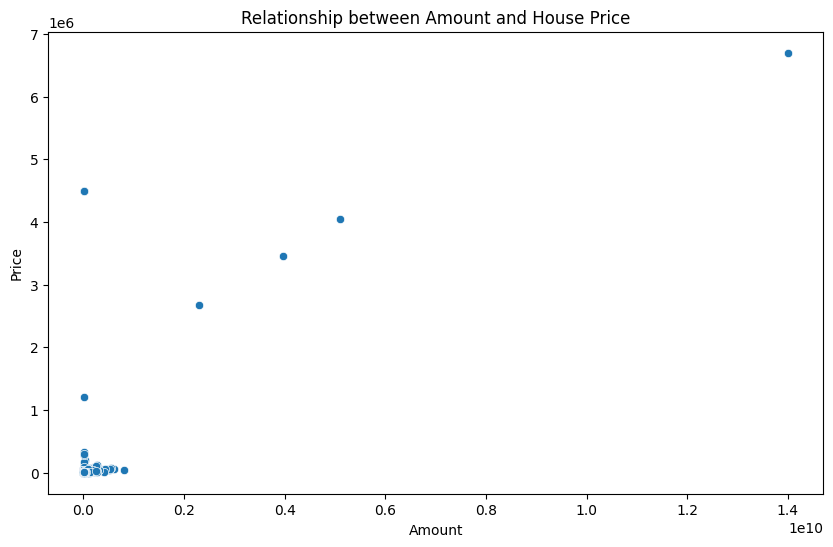

In [69]:
numerical_features = df.select_dtypes(include=[np.number])
for col in numerical_features.columns:
    if col != 'Price':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[col], y=df['Price'])
        plt.title(f'Relationship between {col} and House Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

In [72]:
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [74]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
df.isnull().sum()

Amount                         2935
Price                             0
location_ahmadnagar               0
location_ahmedabad                0
location_allahabad                0
                               ... 
Balcony_9                         0
Balcony_> 10                      0
Ownership_Freehold                0
Ownership_Leasehold               0
Ownership_Power Of Attorney       0
Length: 1056, dtype: int64

In [77]:
df['Amount'].fillna(df['Amount'].median(), inplace=True)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)

In [79]:
print("\nMissing values in X_train:")
print(X_train.isnull().sum().sum())
print("\nMissing values in X_test:")
print(X_test.isnull().sum().sum())


Missing values in X_train:
2340

Missing values in X_test:
595


In [80]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 29350090.04332925
R-squared: -0.44458250879090033


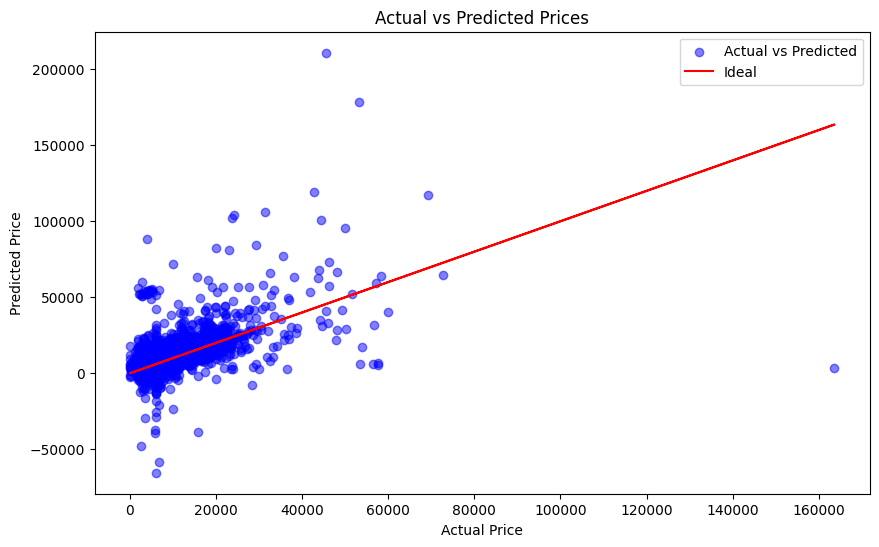

In [86]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='r', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()